### Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\\prasad\\SMIIT\\Working Project\\Flight Price Prediction')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_excel('Data_Train.xlsx')

In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882

#### Data Cleaning of Numeric Value

In [8]:
df['Journey_day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [9]:
df.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

   Journey_day  
0           24  
1            1

In [10]:
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [11]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
df.head(2)

Airline    Source Destination                  Route Dep_Time  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1         13:15   7h 25m     2 stops         No info   7662            1   

   Journey_month  
0              3  
1              5

In [13]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df['Dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour

In [16]:
df['Dep_min']=pd.to_datetime(df.Dep_Time).dt.minute

In [17]:
df.drop('Dep_Time',axis=1,inplace=True)

In [18]:
df.head(2)

Airline    Source Destination                  Route  Arrival_Time  \
0     IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   

   Dep_hour  Dep_min  
0        22       20  
1         5       50

In [19]:
df['Arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour

In [20]:
df['Arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute

In [21]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [22]:
df.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50            13           15

In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [25]:
df.head(3)

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   

   Dep_min  Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0       20             1           10               2             50  
1       50            13           15               7             25  
2       25             4           25              19              0

In [26]:
df.drop('Duration',axis=1,inplace=True)

In [27]:
df.head(2)

Airline    Source Destination                  Route Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25

### Handling Categorical Data

In [28]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

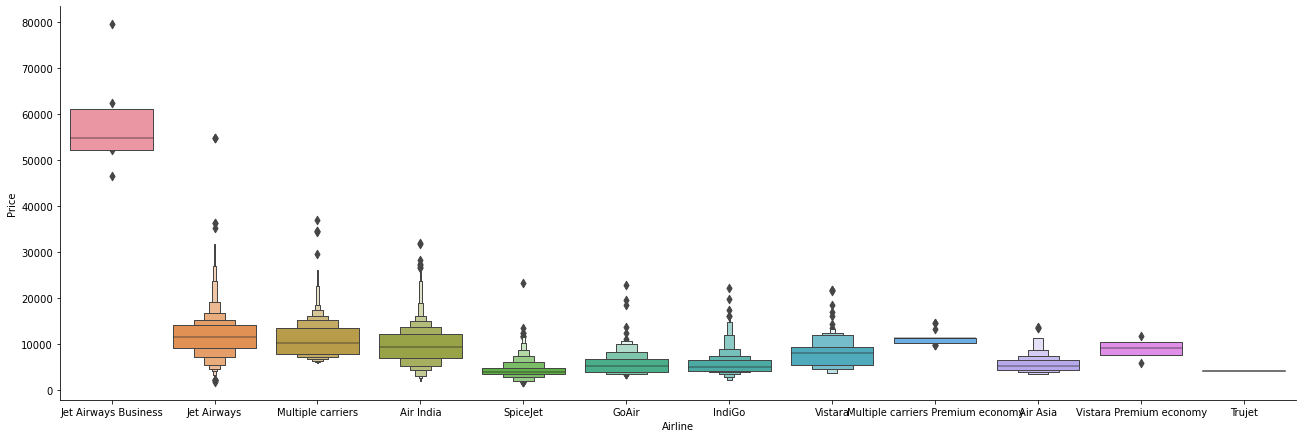

In [29]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending = False),kind="boxen", height = 6,aspect=3)
plt.show()

In [30]:
df.head(2)

Airline    Source Destination                  Route Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25

In [31]:
Airline=df[['Airline']]

In [32]:
Airline

Airline
0                                 IndiGo
1                              Air India
2                            Jet Airways
3                                 IndiGo
4                                 IndiGo
5                               SpiceJet
6                            Jet Airways
7                            Jet Airways
8                            Jet Airways
9                      Multiple carriers
10                             Air India
11                                IndiGo
12                             Air India
13                           Jet Airways
14                                IndiGo
15                             Air India
16                              SpiceJet
17                           Jet Airways
18                             Air India
19                           Jet Airways
20                                 GoAir
21                             Air India
22                                IndiGo
23                                IndiGo
24                           Jet Airways
25                           Jet Airways
26                                IndiGo
27                                 GoAir
28                               Vistara
29                               Vistara
30                               Vistara
31                             Air India
32                                IndiGo
33                           Jet Airways
34                           Jet Airways
35                                IndiGo
36                              SpiceJet
37                             Air India
38                           Jet Airways
39                           Jet Airways
40                     Multiple carriers
41                             Air India
42                           Jet Airways
43                              Air Asia
44                     Multiple carriers
45                              SpiceJet
46                                IndiGo
47                             Air India
48                             Air India
49                           Jet Airways
50                           Jet Airways
51                           Jet Airways
52                                IndiGo
53                                IndiGo
54                              Air Asia
55                           Jet Airways
56                             Air India
57                               Vistara
58                     Multiple carriers
59                               Vistara
60                             Air India
61                             Air India
62                     Multiple carriers
63                                IndiGo
64                               Vistara
65                                IndiGo
66                               Vistara
67                             Air India
68                             Air India
69                                IndiGo
70                           Jet Airways
71                           Jet Airways
72                     Multiple carriers
73                           Jet Airways
74                                IndiGo
75                               Vistara
76                                 GoAir
77                                IndiGo
78                           Jet Airways
79                              SpiceJet
80                           Jet Airways
81                           Jet Airways
82                           Jet Airways
83                                IndiGo
84                     Multiple carriers
85                           Jet Airways
86                                IndiGo
87                           Jet Airways
88                           Jet Airways
89                           Jet Airways
90                     Multiple carriers
91                     Multiple carriers
92                           Jet Airways
93                             Air India
94                             Air India
95                                IndiGo
96                              SpiceJet
97             

In [33]:
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [34]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

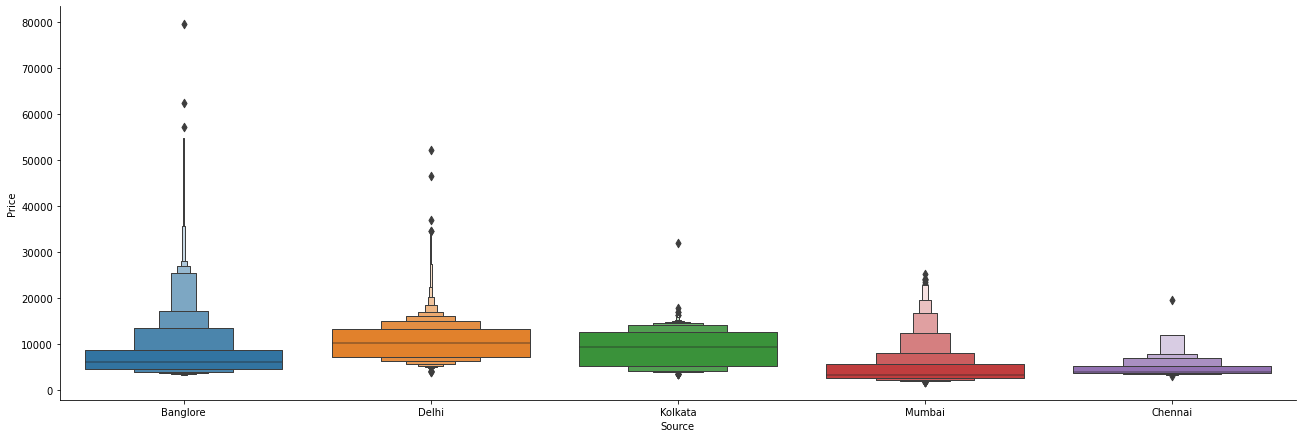

In [35]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [36]:
Source=df[['Source']]

In [37]:
Source

Source
0      Banglore
1       Kolkata
2         Delhi
3       Kolkata
4      Banglore
5       Kolkata
6      Banglore
7      Banglore
8      Banglore
9         Delhi
10        Delhi
11      Kolkata
12      Chennai
13      Kolkata
14      Kolkata
15        Delhi
16        Delhi
17        Delhi
18        Delhi
19        Delhi
20        Delhi
21     Banglore
22     Banglore
23     Banglore
24      Kolkata
25        Delhi
26        Delhi
27        Delhi
28     Banglore
29      Chennai
30      Chennai
31      Kolkata
32     Banglore
33        Delhi
34        Delhi
35        Delhi
36      Kolkata
37      Kolkata
38     Banglore
39        Delhi
40        Delhi
41     Banglore
42        Delhi
43     Banglore
44        Delhi
45     Banglore
46     Banglore
47      Chennai
48      Kolkata
49        Delhi
50        Delhi
51      Kolkata
52     Banglore
53     Banglore
54     Banglore
55      Kolkata
56     Banglore
57      Chennai
58        Delhi
59       Mumbai
60      Kolkata
61        Delhi
62        Delhi
63        Delhi
64      Chennai
65        Delhi
66     Banglore
67       Mumbai
68        Delhi
69      Chennai
70       Mumbai
71     Banglore
72        Delhi
73        Delhi
74        Delhi
75     Banglore
76     Banglore
77       Mumbai
78        Delhi
79      Chennai
80      Kolkata
81     Banglore
82      Kolkata
83        Delhi
84        Delhi
85     Banglore
86        Delhi
87        Delhi
88      Kolkata
89      Kolkata
90        Delhi
91        Delhi
92     Banglore
93        Delhi
94      Kolkata
95      Chennai
96     Banglore
97     Banglore
98       Mumbai
99        Delhi
100     Kolkata
101     Kolkata
102       Delhi
103     Kolkata
104    Banglore
105       Delhi
106       Delhi
107       Delhi
108       Delhi
109       Delhi
110    Banglore
111    Banglore
112     Kolkata
113       Delhi
114       Delhi
115       Delhi
116       Delhi
117       Delhi
118    Banglore
119       Delhi
120    Banglore
121      Mumbai
122     Kolkata
123       Delhi
124     Chennai
125     Kolkata
126     Kolkata
127     Kolkata
128    Banglore
129     Chennai
130    Banglore
131       Delhi
132       Delhi
133     Kolkata
134       Delhi
135       Delhi
136       Delhi
137       Delhi
138    Banglore
139       Delhi
140       Delhi
141     Kolkata
142       Delhi
143       Delhi
144       Delhi
145     Kolkata
146       Delhi
147       Delhi
148       Delhi
149       Delhi
150     Kolkata
151       Delhi
152    Banglore
153     Kolkata
154     Kolkata
155     Kolkata
156       Delhi
157    Banglore
158     Kolkata
159       Delhi
160     Kolkata
161    Banglore
162     Kolkata
163       Delhi
164       Delhi
165       Delhi
166      Mumbai
167    Banglore
168       Delhi
169    Banglore
170       Delhi
171       Delhi
172     Kolkata
173       Delhi
174     Kolkata
175     Kolkata
176       Delhi
177     Kolkata
178     Kolkata
179       Delhi
180       Delhi
181      Mumbai
182       Delhi
183     Kolkata
184     Chennai
185       Delhi
186       Delhi
187     Kolkata
188     Kolkata
189    Banglore
190    Banglore
191       Delhi
192       Delhi
193    Banglore
194    Banglore
195     Chennai
196     Kolkata
197       Delhi
198    Banglore
199       Delhi
200     Kolkata
201    Banglore
202       Delhi
203       Delhi
204       Delhi
205    Banglore
206       Delhi
207    Banglore
208     Kolkata
209       Delhi
210    Banglore
211       Delhi
212       Delhi
213       Delhi
214       Delhi
215      Mumbai
216     Kolkata
217    Banglore
218    Banglore
219       Delhi
220    Banglore
221       Delhi
222      Mumbai
223       Delhi
224       Delhi
225       Delhi
226       Delhi
227    Banglore
228      Mumbai
229      Mumbai
230     Kolkata
231     Kolkata
232       Delhi
233       Delhi
234       Delhi
235     Kolkata
236       Delhi
237       Delhi
238    Banglore
239       Delhi
240    Banglore
241     Kolkata
242       Delhi
243     Chennai
244     Chennai
245    Banglore
246       Delhi
247       Delhi
248     Chennai
249      

In [38]:
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [39]:
df.head(2)

Airline    Source Destination                  Route Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25

In [40]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [41]:
Destination=df[['Destination']]

In [42]:
Destination

Destination
0       New Delhi
1        Banglore
2          Cochin
3        Banglore
4       New Delhi
5        Banglore
6       New Delhi
7       New Delhi
8       New Delhi
9          Cochin
10         Cochin
11       Banglore
12        Kolkata
13       Banglore
14       Banglore
15         Cochin
16         Cochin
17         Cochin
18         Cochin
19         Cochin
20         Cochin
21      New Delhi
22          Delhi
23          Delhi
24       Banglore
25         Cochin
26         Cochin
27         Cochin
28          Delhi
29        Kolkata
30        Kolkata
31       Banglore
32          Delhi
33         Cochin
34         Cochin
35         Cochin
36       Banglore
37       Banglore
38      New Delhi
39         Cochin
40         Cochin
41      New Delhi
42         Cochin
43          Delhi
44         Cochin
45      New Delhi
46          Delhi
47        Kolkata
48       Banglore
49         Cochin
50         Cochin
51       Banglore
52      New Delhi
53          Delhi
54          Delhi
55       Banglore
56      New Delhi
57        Kolkata
58         Cochin
59      Hyderabad
60       Banglore
61         Cochin
62         Cochin
63         Cochin
64        Kolkata
65         Cochin
66          Delhi
67      Hyderabad
68         Cochin
69        Kolkata
70      Hyderabad
71      New Delhi
72         Cochin
73         Cochin
74         Cochin
75      New Delhi
76          Delhi
77      Hyderabad
78         Cochin
79        Kolkata
80       Banglore
81      New Delhi
82       Banglore
83         Cochin
84         Cochin
85      New Delhi
86         Cochin
87         Cochin
88       Banglore
89       Banglore
90         Cochin
91         Cochin
92      New Delhi
93         Cochin
94       Banglore
95        Kolkata
96          Delhi
97          Delhi
98      Hyderabad
99         Cochin
100      Banglore
101      Banglore
102        Cochin
103      Banglore
104         Delhi
105        Cochin
106        Cochin
107        Cochin
108        Cochin
109        Cochin
110     New Delhi
111         Delhi
112      Banglore
113        Cochin
114        Cochin
115        Cochin
116        Cochin
117        Cochin
118         Delhi
119        Cochin
120         Delhi
121     Hyderabad
122      Banglore
123        Cochin
124       Kolkata
125      Banglore
126      Banglore
127      Banglore
128         Delhi
129       Kolkata
130     New Delhi
131        Cochin
132        Cochin
133      Banglore
134        Cochin
135        Cochin
136        Cochin
137        Cochin
138         Delhi
139        Cochin
140        Cochin
141      Banglore
142        Cochin
143        Cochin
144        Cochin
145      Banglore
146        Cochin
147        Cochin
148        Cochin
149        Cochin
150      Banglore
151        Cochin
152         Delhi
153      Banglore
154      Banglore
155      Banglore
156        Cochin
157     New Delhi
158      Banglore
159        Cochin
160      Banglore
161     New Delhi
162      Banglore
163        Cochin
164        Cochin
165        Cochin
166     Hyderabad
167         Delhi
168        Cochin
169         Delhi
170        Cochin
171        Cochin
172      Banglore
173        Cochin
174      Banglore
175      Banglore
176        Cochin
177      Banglore
178      Banglore
179        Cochin
180        Cochin
181     Hyderabad
182        Cochin
183      Banglore
184       Kolkata
185        Cochin
186        Cochin
187      Banglore
188      Banglore
189         Delhi
190     New Delhi
191        Cochin
192        Cochin
193         Delhi
194     New Delhi
195       Kolkata
196      Banglore
197        Cochin
198     New Delhi
199        Cochin
200      Banglore
201         Delhi
202        Cochin
203        Cochin
204        Cochin
205         Delhi
206        Cochin
207         Delhi
208      Banglore
209        Cochin
210         Delhi
211        Cochin
212        Cochin
213        Cochin
214        Cochin
215     Hyderabad
216      Banglore
217         Delhi
218         Delhi
219        Cochin
220         Delhi
221       

In [43]:
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [44]:
df.head(2)

Airline    Source Destination                  Route Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25

In [45]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [46]:
df.head(1)

Airline    Source Destination Total_Stops  Price  Journey_day  \
0  IndiGo  Banglore   New Delhi    non-stop   3897           24   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   

   Duration_hours  Duration_mins  
0               2             50

In [47]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [49]:
stops_map={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [50]:
df['Total_Stops']=df['Total_Stops'].map(stops_map)

In [51]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [52]:
df.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [53]:
train_data=pd.concat([df,Airline,Source,Destination],axis=1)

In [54]:
train_data.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  Airline_Air India  Airline_GoAir  \
0               2             50                  0              0   
1               7             25                  1              0   
2              19              0                  0              0   
3               5             25                  0              0   
4               4             45                  0              0   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0               1                    0                             0   
1               0                    0                             0   
2               0                    1                             0   
3               1                    0                             0   
4               1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          0                                          0   
4                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

In [55]:
train_data.shape

(10682, 33)

In [56]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [57]:
train_data.shape

(10682, 30)

In [58]:
train_data.head(1)

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1

In [59]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [60]:
X=train_data.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [61]:
X.shape

(10682, 29)

In [62]:
X.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_min  Duration_hours  Duration_mins  Airline_Air India  \
0           10               2             50                  0   
1           15               7             25                  1   
2           25              19              0                  0   
3           30               5             25                  0   
4           35               4             45                  0   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0   
1              0               0                    0   
2              0               0                    1   
3              0               1                    0   
4              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [63]:
y=train_data.iloc[:,1]

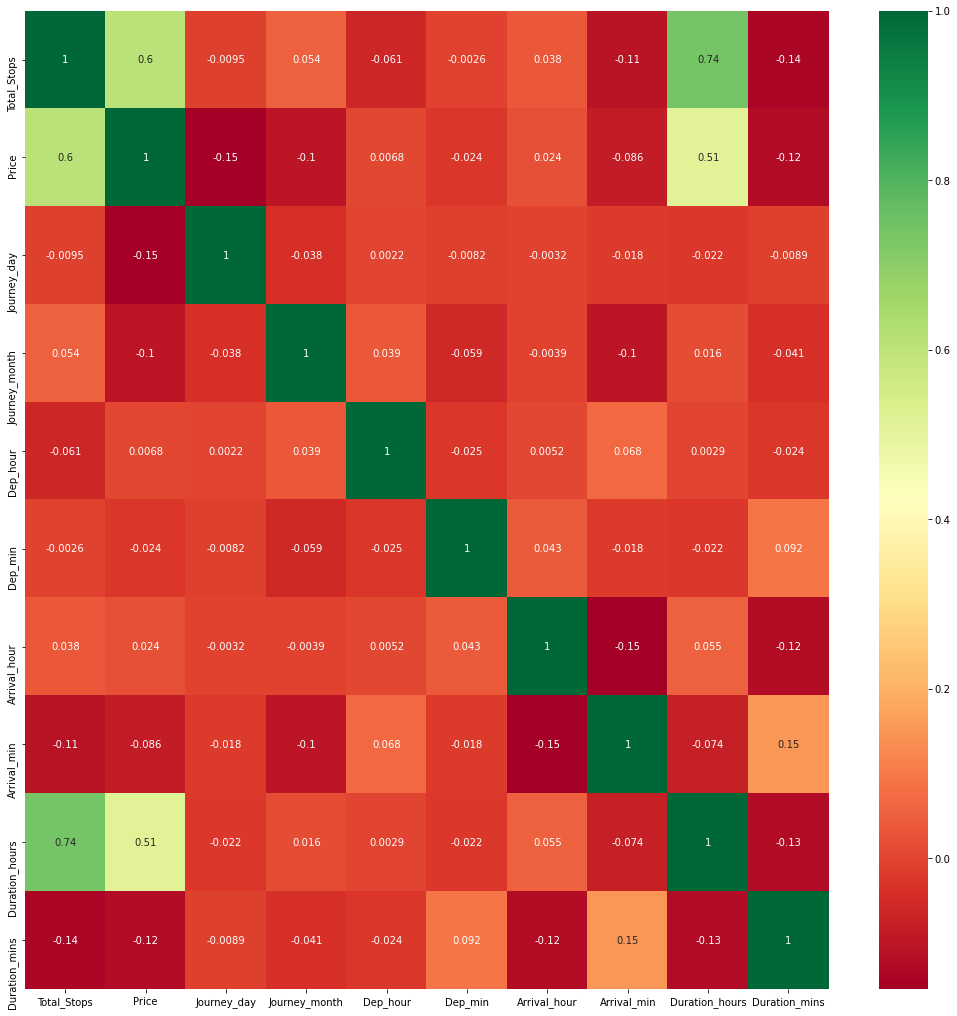

In [64]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [65]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [66]:
print(selection.feature_importances_)

[2.09256337e-01 1.43495849e-01 5.33444225e-02 2.39959413e-02
 2.10849973e-02 2.74270640e-02 1.94567467e-02 1.47873066e-01
 1.74609040e-02 1.03635721e-02 2.11688996e-03 1.79026312e-02
 1.37014116e-01 6.75930761e-02 1.83777552e-02 8.40945737e-04
 3.46523956e-03 9.08559431e-05 5.11614879e-03 7.95598461e-05
 4.48687538e-04 9.95291246e-03 3.31755435e-03 4.94119203e-03
 1.13802306e-02 1.10803674e-02 7.04644861e-03 5.34525699e-04
 2.49419626e-02]


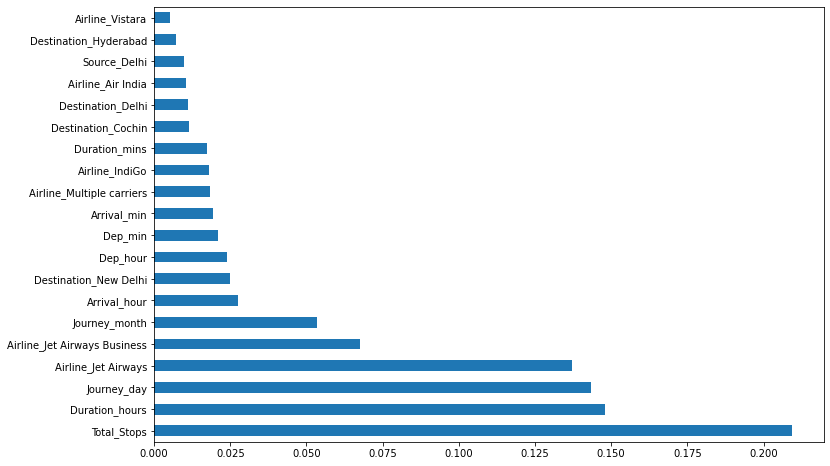

In [67]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(X_test)

In [71]:
reg_rf.score(X_train, y_train)

0.9526907391007514

In [72]:
reg_rf.score(X_test, y_test)

0.7966873705847064

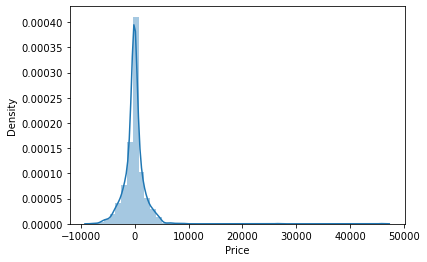

In [73]:
sns.distplot(y_test-y_pred)
plt.show()

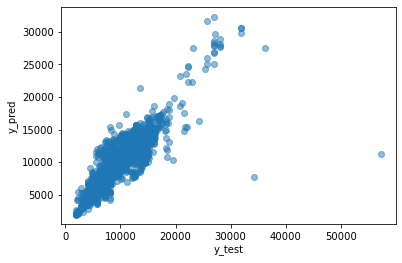

In [74]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Hyperparameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [79]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
prediction = rf_random.predict(X_test)

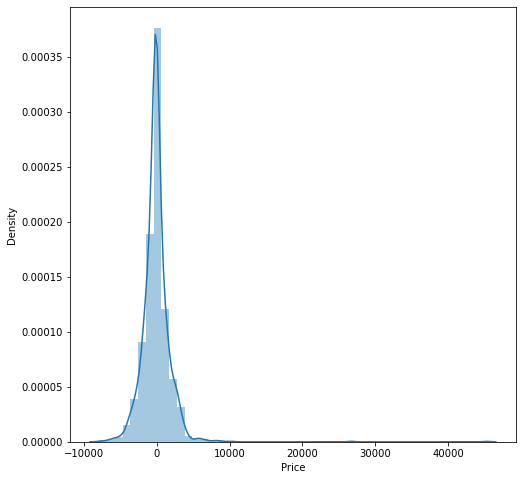

In [82]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

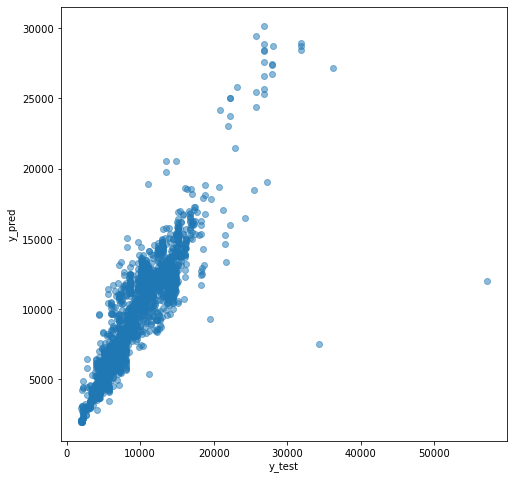

In [83]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Save the model to reuse it again

In [84]:
import pickle,joblib

In [85]:
pickle.dump(reg_rf,open('flight.pkl','wb'))

In [86]:
joblib.dump(reg_rf,'flight.jbl')

['flight.jbl']

### Load Pickle Model

In [87]:
model_pkl=pickle.load(open('flight.pkl','rb'))

In [88]:
model_pkl.score(X_test,y_test)

0.7966873705847064

In [89]:
model_pkl.score(X_train,y_train)

0.9526907391007514

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
cv=cross_val_score(RandomForestRegressor(),X_train,y_train)
print('n_split',cv)
print('Average',np.average(cv))

n_split [0.81124103 0.8274795  0.7891944  0.78347849 0.79521657]
Average 0.8013219974304334


### Load Joblib Model

In [92]:
model_jbl=joblib.load('flight.jbl')

In [93]:
model_jbl.score(X_train,y_train)

0.9526907391007514

In [94]:
model_jbl.score(X_test,y_test)

0.7966873705847064

In [95]:
cv=cross_val_score(RandomForestRegressor(),X_train,y_train)
print('n_split',cv)
print('Average',np.average(cv))

n_split [0.8140968  0.83106682 0.78711741 0.78461148 0.79607158]
Average 0.8025928188946418
